In [ ]:
#@title Run this to prepare the environment


# Imports the required libraries
import cv2
import dlib
import math
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat"
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'

print ("Done")

shape_predictor_68_ 100%[===================>]  95.08M  30.4MB/s    in 3.9s    
Done


##Face Detection Demonstration



Face detection is an important step in the emotion classification pipeline. It helps us eliminate parts of the image which have no relevance in detecting the emotion.

Face detection algorithms are used to predict the bounding box coordinates of the face.



![](https://drive.google.com/uc?id=1oxMqFcBJgk-Z1DAc82a8XZESslzaxoA0)
<!-- https://www.researchgate.net/figure/Different-types-of-face-bounding-boxes-boxes-detected-by-Viola-Jones-detector-boxes_fig2_338168587 -->

Dlib is a popular Python library complied in C++. For this project we will use
Dlib's pre-trained face detection model to extract the bounding box coordinates of the face.


###Load Pretrained Dlib model

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [ ]:
#@title Run this cell to define a helper function for face detection

'''
  Converts dlib rectangular object to bounding box coordinates
'''
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)


In [ ]:
#@title Run this cell to define a helper function for face detection with a given image

"""
Detects the face in the given image
"""
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None

  """
  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    return "Please check the URL and try again!"

  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)

  if len(rects) < 1:
    return "No Face Detected"

  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box coordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()


### Face Detection


###Example of the images

Enter the URL of the image: https://media.istockphoto.com/photos/man-with-eyes-closed-meditating-picture-id184919955?k=6&m=184919955&s=170667a&w=0&h=Vg0K_hOpXbdZtYaFIK0zsIQkFJZJRXt5HfxM8_RGObk=


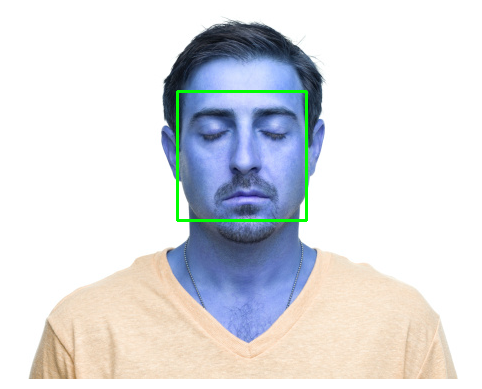

In [ ]:
# https://media.istockphoto.com/photos/man-with-eyes-closed-meditating-picture-id184919955?k=6&m=184919955&s=170667a&w=0&h=Vg0K_hOpXbdZtYaFIK0zsIQkFJZJRXt5HfxM8_RGObk=
# https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg

# Give the path of the image for face detection
detect_face(input('Enter the URL of the image: '));  # run cell and when prompted, input a URL of an img and press 'enter'!

**What are Facial Landmarks?**


Facial landmarks are a set of key points on human face images. They represent the points of interest within the face. The points are defined by their (x,y) coordinates on the image, and are used to locate and represent salient regions of the face, such as eyes, eyebrows, nose, mouth and jawline.

##Facial Landmark Demonstration

The number of facial key points on the face can be variable depending on the pre-trained facial landmark model being used.<br>




<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3TMlMcOORwi88JUPO3xvHbjl8yBGDZnMMNhfpY5pS4Mvq_n7w' width='550' ><br>
For this project, we will be using Dlib's pretrained Facial Landmark Detection Model which will help us detect 68 2-Dimensional points on the human face.

<br> The image above shows the location and indices of the 68 facial landmarks.


## Facial Landmark Estimation using DLib

In this section, we are going to look at the code to extract and plot the 68 facial landmarks for the given image.



###Load Pre-trained DLib models

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

### Extracting Facial Landmarks

In [ ]:
#@title Run this cell to define a helper function for face detection from a url


"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents
                     the x and y coordinates of facial keypoints
  """

  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None

  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None

  return image,landmarks

###Visualizing Facial Landmarks

In [ ]:
#@title Run this cell to define a helper function to visualize landmarks

"""
Display image with its Facial Landmarks
"""
def plot_image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents
                     the x and y coordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)

  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()


###Testing



Enter the URL of the image: https://media.istockphoto.com/photos/man-with-eyes-closed-meditating-picture-id184919955?k=6&m=184919955&s=170667a&w=0&h=Vg0K_hOpXbdZtYaFIK0zsIQkFJZJRXt5HfxM8_RGObk=


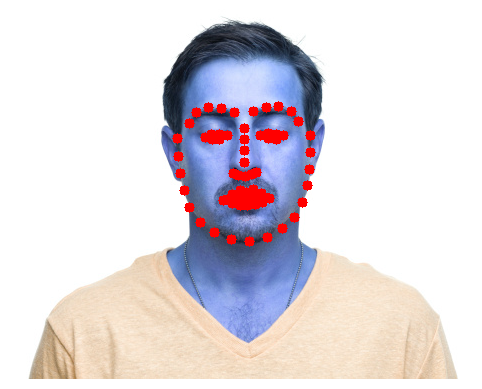

In [ ]:
#Extract the Facial Landmark coordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  plot_image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [ ]:
#@title Run (and eventually edit) this cell to visualize the features we've extracted

def show_indices(landmarks, i_index):

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices')

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index?
  x = landmarks[i_index][0]
  y = -landmarks[i_index][1]
  plt.scatter(x=x, y=y,
             color='purple', s=100, marker='x', label='feature at index %d'%i_index)

  plt.scatter(x, y, color='red', alpha=.5, label='selected indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1]);
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2);

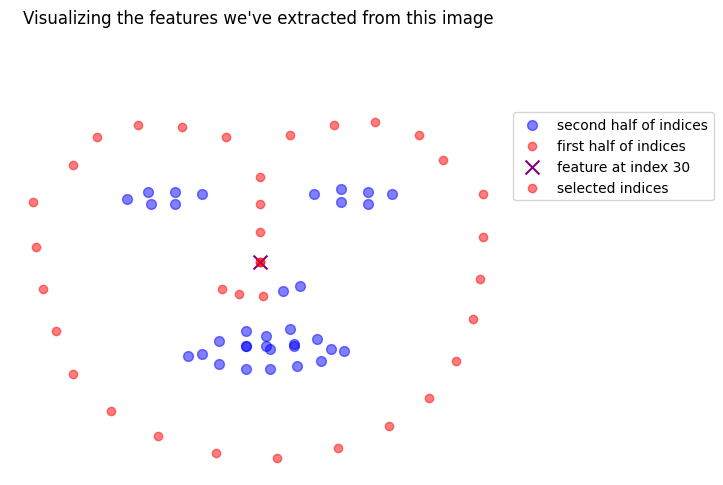

In [ ]:
show_index = 30
show_indices(landmarks, show_index)

In [ ]:
np.array(landmarks).shape

(68, 2)

In [ ]:
landmark_indices = {'eyes':(36,47),
                    "nose":(27,35),
                    "mouth":(48,67),
                    "jawline":(0,17),
                    "eyebrow":(18,27)}


print(landmark_indices["eyes"])

(36, 47)


[(195, 128), (201, 125), (209, 125), (217, 126), (209, 130), (202, 130), (250, 126), (258, 124), (266, 125), (273, 126), (266, 130), (258, 129)]


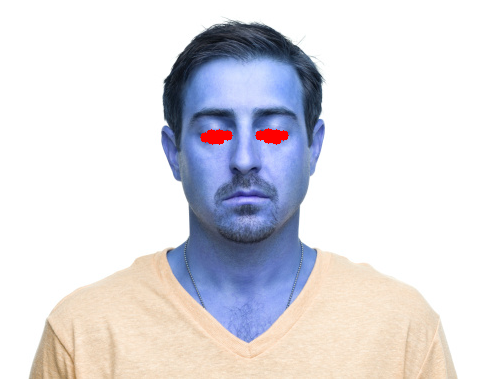

[(234, 119), (234, 130), (234, 141), (234, 153), (223, 164), (228, 166), (235, 167), (241, 165), (246, 163)]


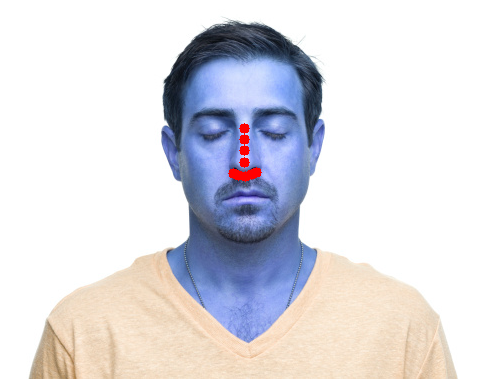

[(213, 191), (222, 185), (230, 181), (236, 183), (243, 180), (251, 184), (259, 189), (252, 193), (245, 195), (237, 196), (230, 196), (222, 194), (217, 190), (230, 187), (236, 187), (244, 186), (255, 188), (244, 187), (237, 188), (230, 187)]


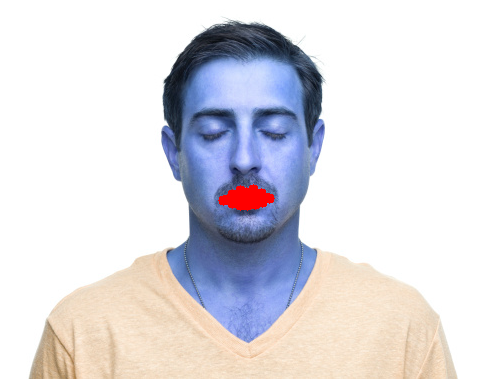

[(167, 129), (168, 147), (170, 164), (174, 181), (179, 198), (190, 213), (204, 223), (221, 230), (239, 232), (257, 228), (272, 219), (284, 208), (292, 193), (297, 176), (299, 160), (300, 143), (300, 126), (179, 114)]


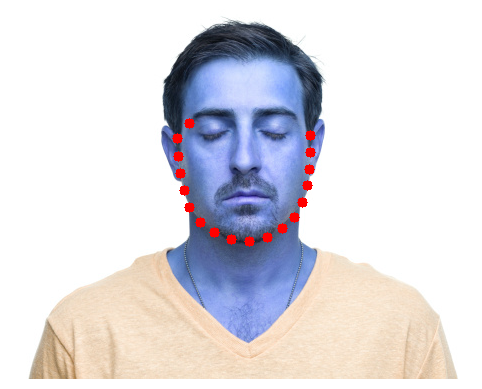

[(186, 103), (198, 98), (211, 99), (224, 103), (243, 102), (256, 98), (268, 97), (281, 102), (288, 112), (234, 119)]


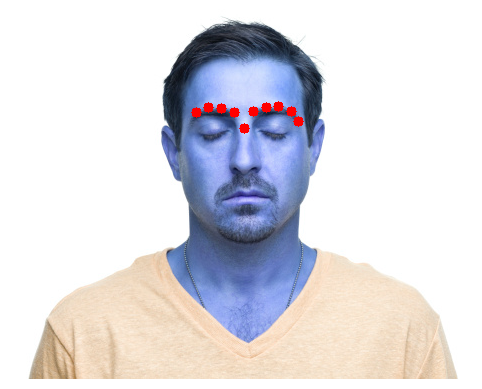

In [ ]:
# Display images with individual detection of face parts

# For example, for eye detection:

'''eye_points = np.array([36,47])
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image,selected_landmarks)'''


for i in landmark_indices:
  points=np.array(landmark_indices[i])
  selected_landmarks=landmarks[points[0]:points[1]+1]
  print(selected_landmarks)
  plot_image_landmarks(image,selected_landmarks)


Euclidean distance is the length of the line segment connecting two points. When data is dense or continuous, this is the best proximity measure.

The equation is as follows. Given two points $p$ and $q$:
$$distance(p, q) = \sqrt{(q_x-p_x)^2+(q_y-p_y)^2}$$

In this section, we will explore how euclidean distance between pairs of facial landmarks can help solve simple use cases related to faces.

In [ ]:
"""
Computes the euclidean distance between 2 points p and q in 2D space
#inexing#math.sqrt
"""

def euclidean_distance(p,q):
  """
  type p, q : tuple
  rtype distance: float
  """

  distance= math.sqrt((q[0]-p[0])**2 +(q[1]-p[1])**2)
  return distance



In [ ]:
p = (0, 0)
q = (3, 4)
print("The distance between points ",p," and ",q," is: ",euclidean_distance(p, q))

The distance between points  (0, 0)  and  (3, 4)  is:  5.0


---

### Pseudo-Algorithm

1. Identify the facial landmarks of interest.
2. Compute the distances between the points of interest.
3. Compare the distances of both the images.
4. Establish a threshold value for distances that differentiates between eyes being open or closed.
5. Determine the state of the eyes in each image (open or closed) by comparing the computed distances with the established threshold.
6. Output a classification for each image based on the comparison.

---

In [ ]:
from inspect import formatargspec
"""
Distinguishes between two images--->closed eyes vs open eyes
"""
def classify_images(image1_path,image2_path,plt_flag):
  """
  type image1_path,image2_path: str
  type plt_flag: boolean #Displays input images if True
  rtype : str
  """
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)

  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()

    pairs=[(38,40),(44,46)]
    dist1=0
    dist2=0
    difference=0

    for pair in pairs:
      dist1=euclidean_distance(image1_landmarks[pair[0]], image1_landmarks[pair[1]])
      dist2=euclidean_distance(image2_landmarks[pair[0]], image2_landmarks[pair[1]])

    difference= dist1-dist2
    if abs(difference) > 10:
      if difference > 0:
        print("Image 1 has open eyes")
      else:
        print("Image 2 has open eyes")
    else:
      if difference > 0:
        print("Image 2 has closed eyes")
      else:
        print("Image 1 has closed eyes")



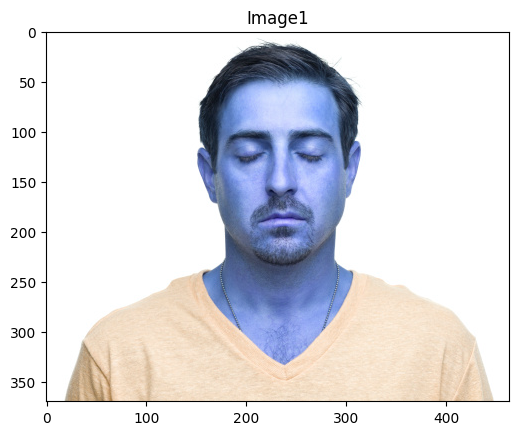

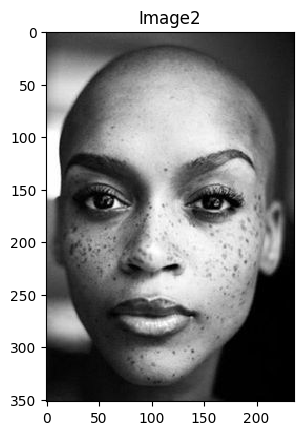

Image 1 has closed eyes


In [ ]:
image_1 = "https://media.istockphoto.com/photos/man-with-eyes-closed-meditating-picture-id184919955?k=6&m=184919955&s=170667a&w=0&h=Vg0K_hOpXbdZtYaFIK0zsIQkFJZJRXt5HfxM8_RGObk="
image_2 = "https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg"

classify_images(image_1, image_2, plt_flag = True)

#Finish!